In [13]:
import pandas as pd
import numpy as np
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("talk")
sns.set_style("white")

In [14]:
df = pd.read_csv("sim_data_full_v2.csv")

In [15]:
scenarios_to_plot = [1,4,13,16,30]

In [16]:
df_scatterplot = df[np.in1d(df["scenario_number"], scenarios_to_plot)]

meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


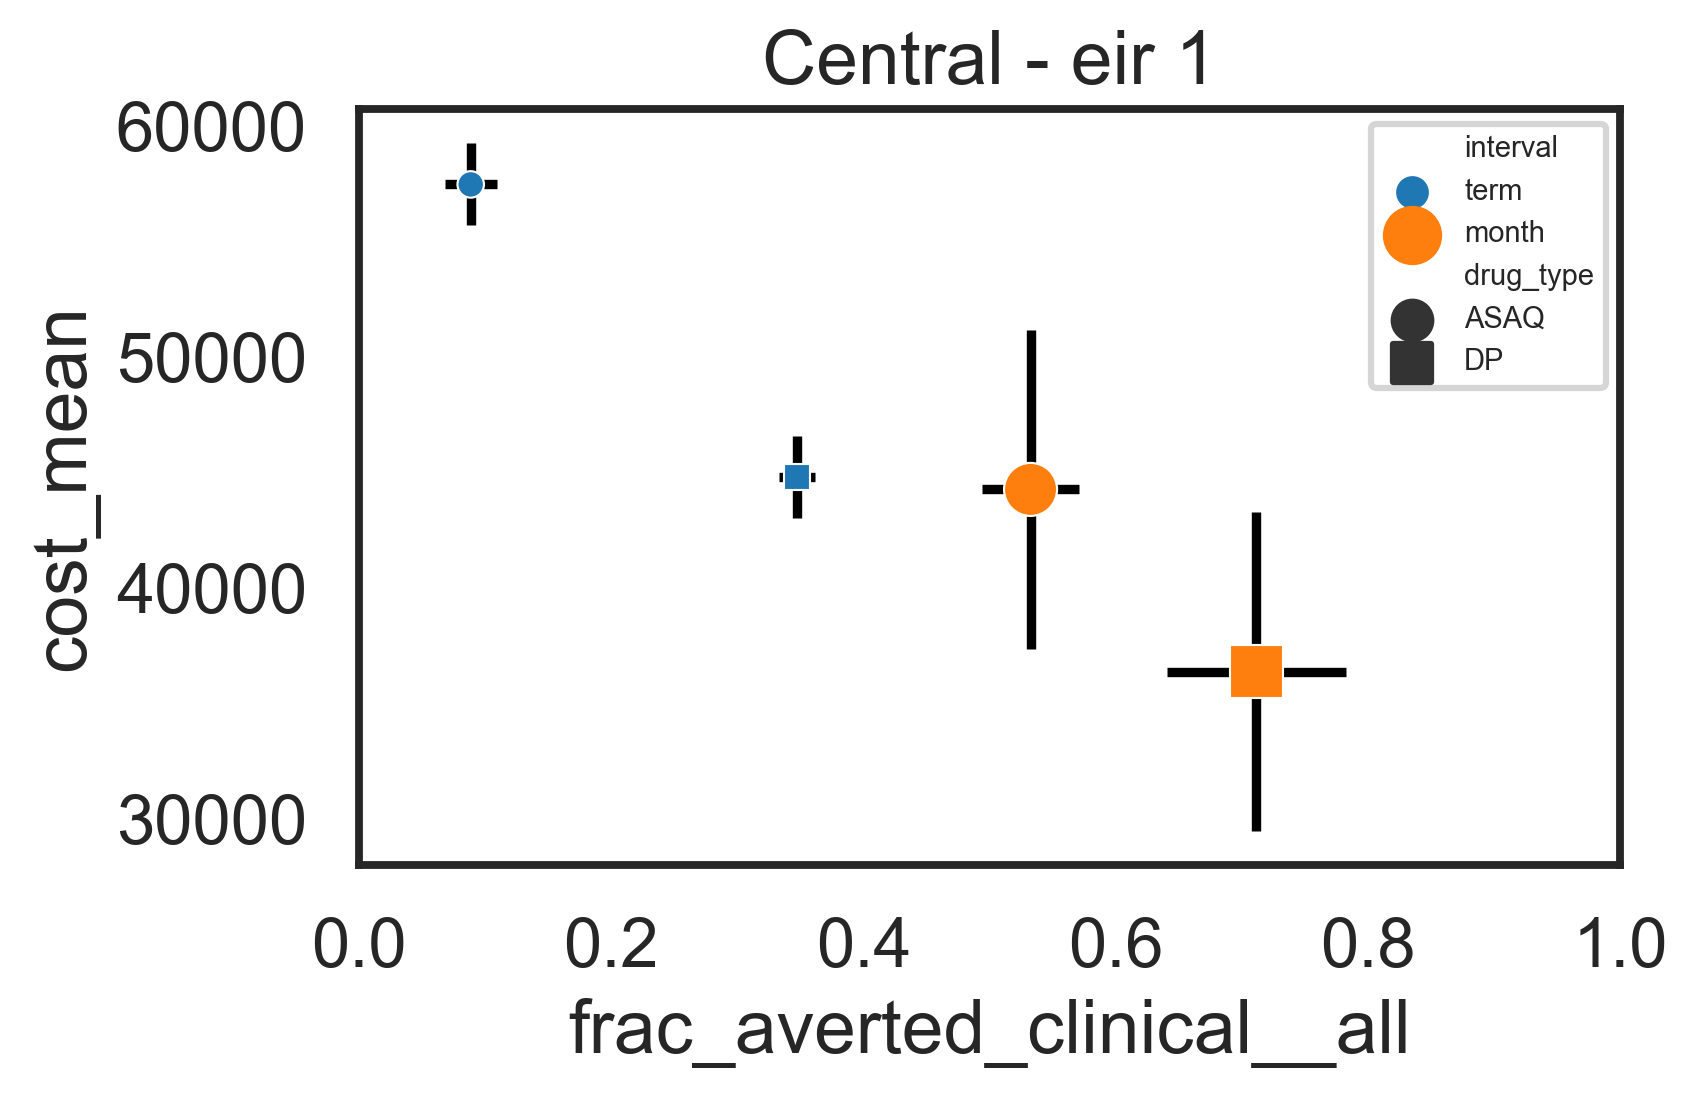

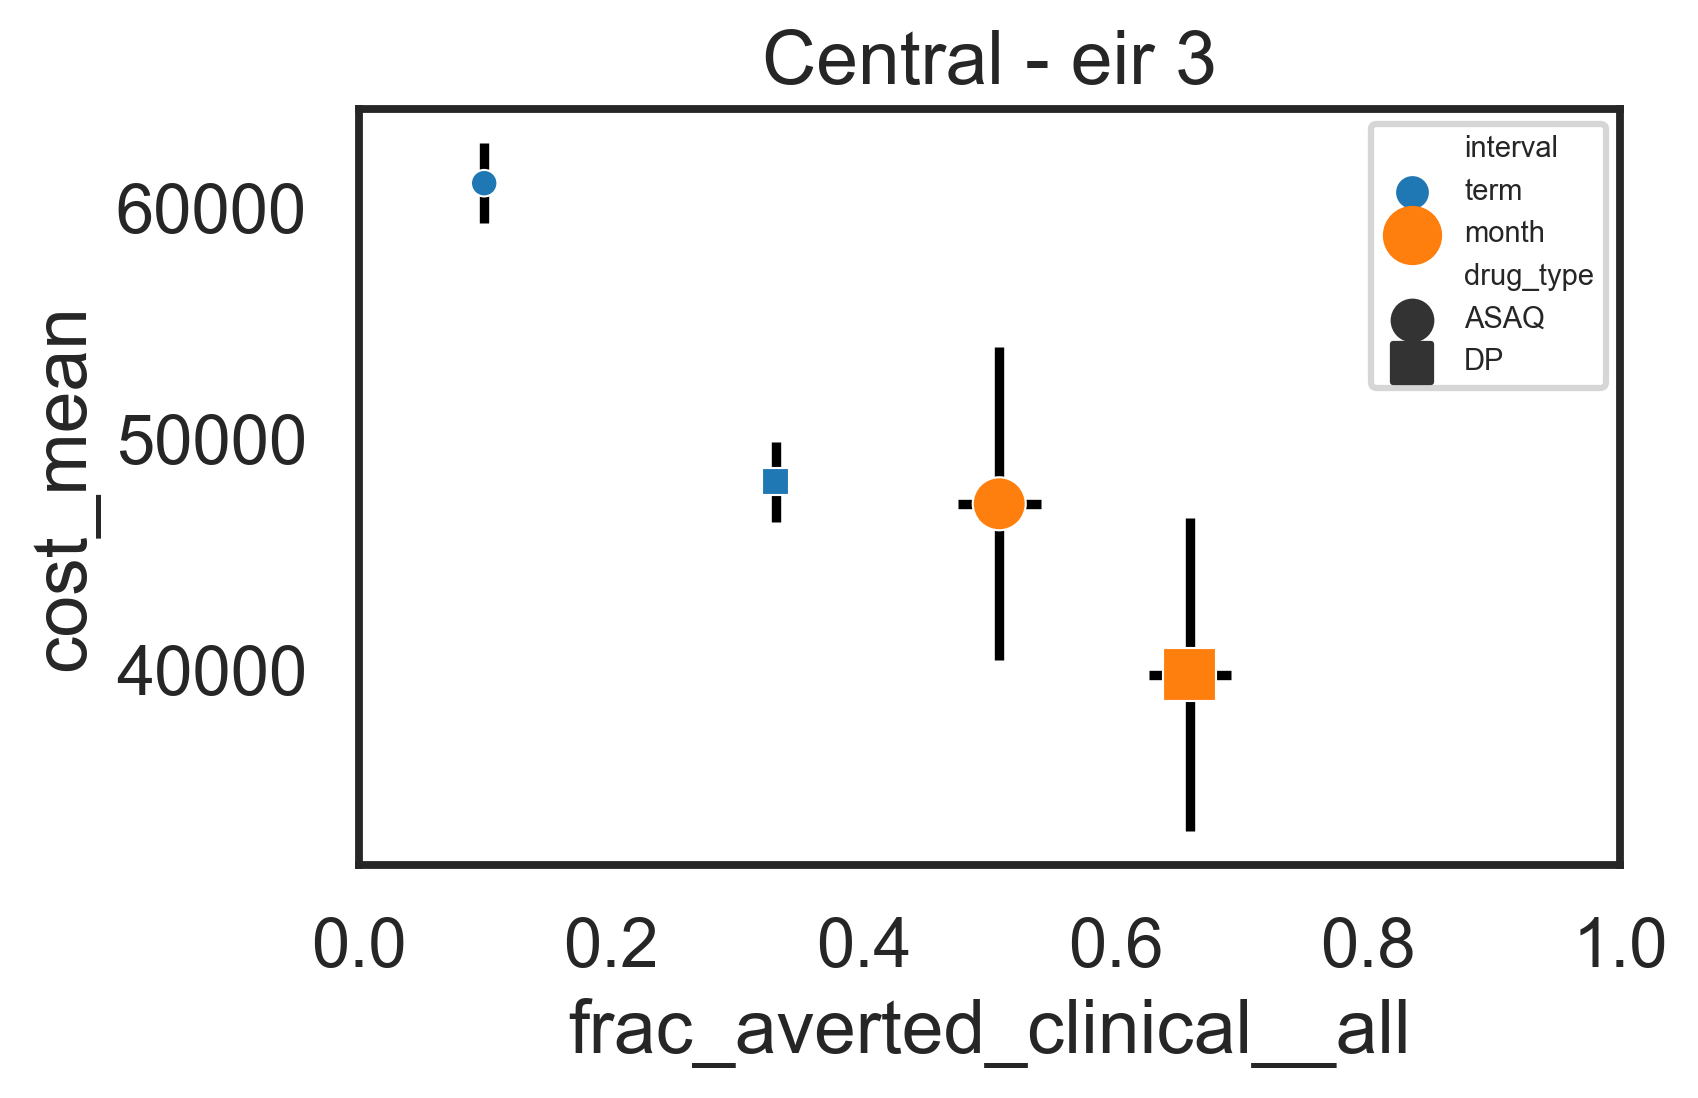

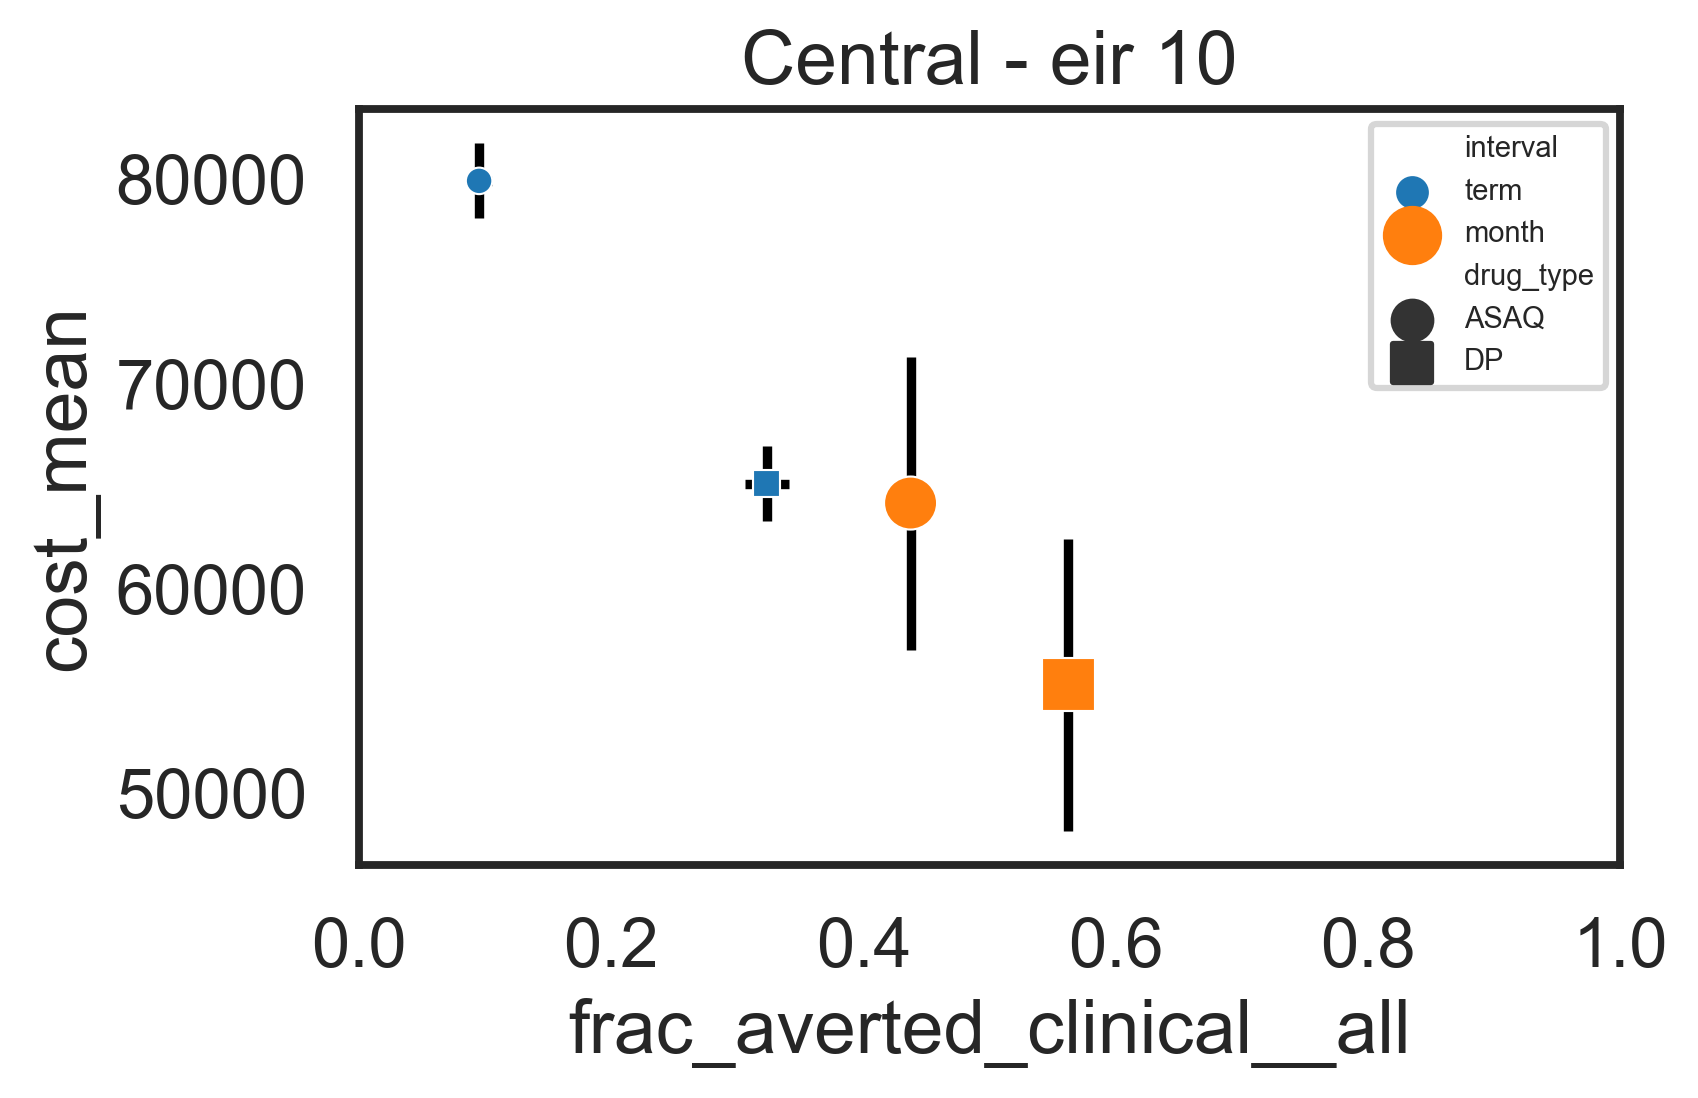

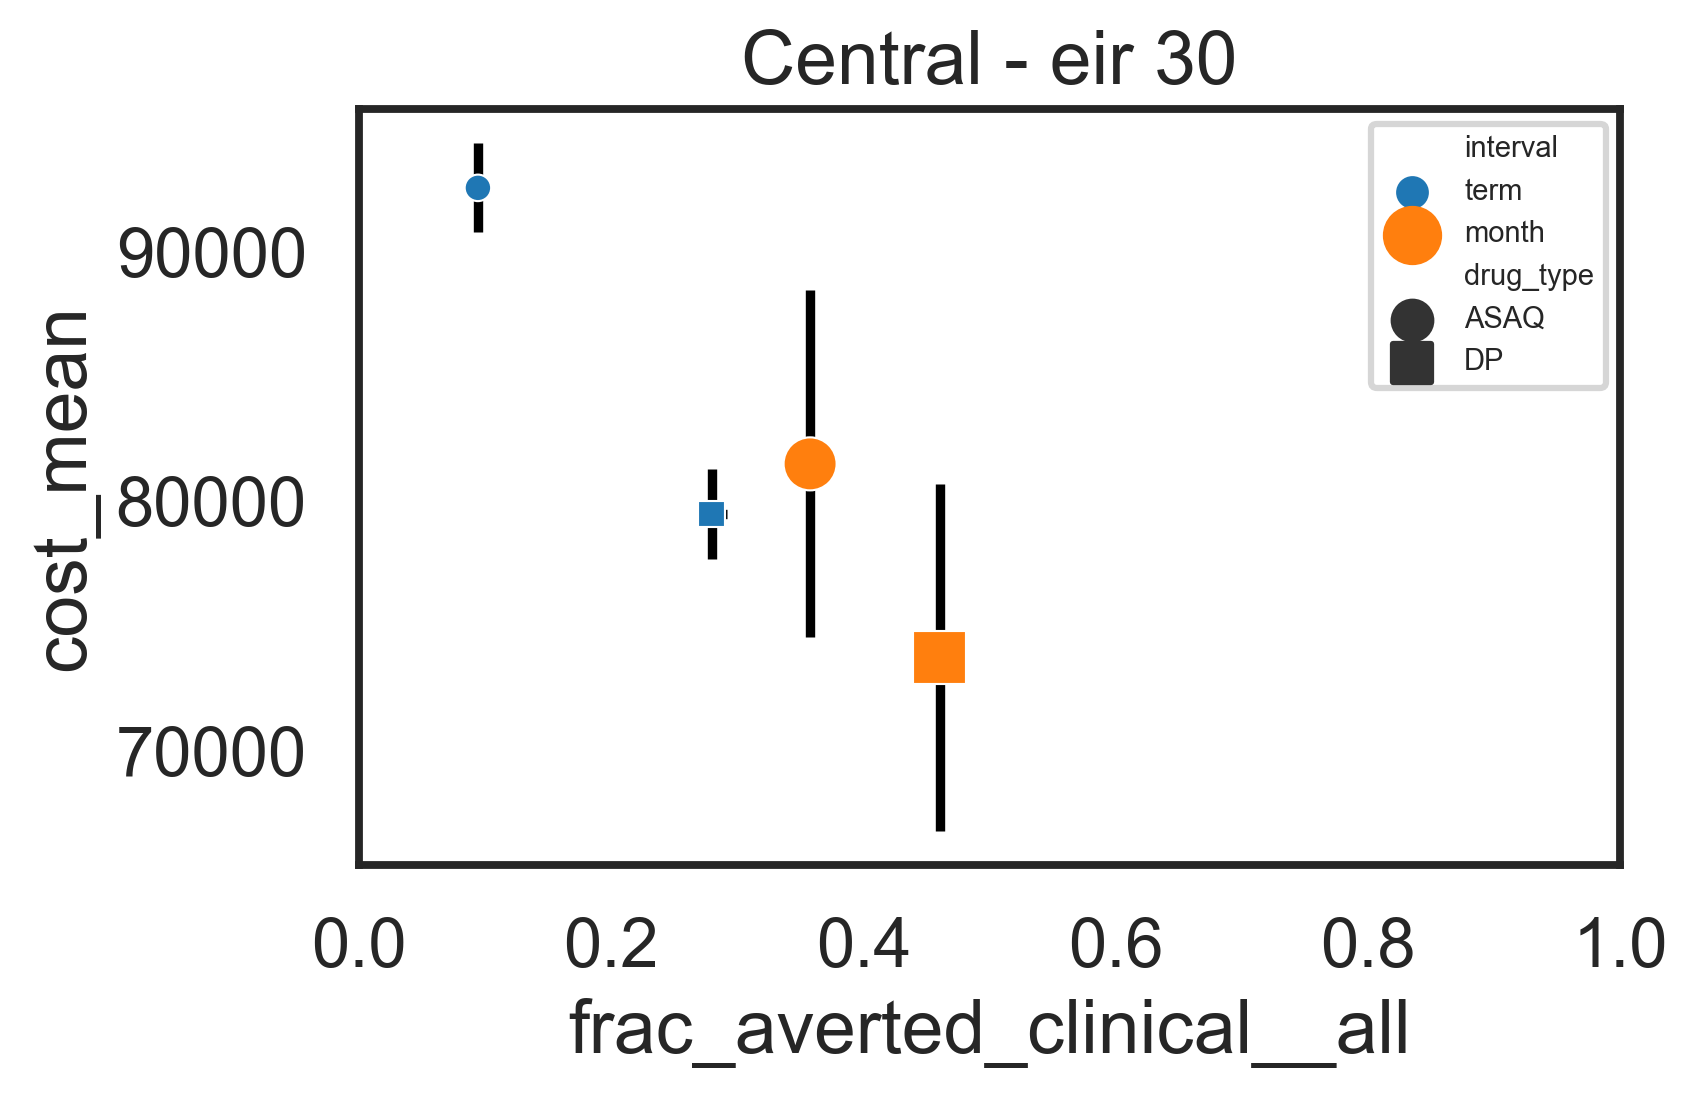

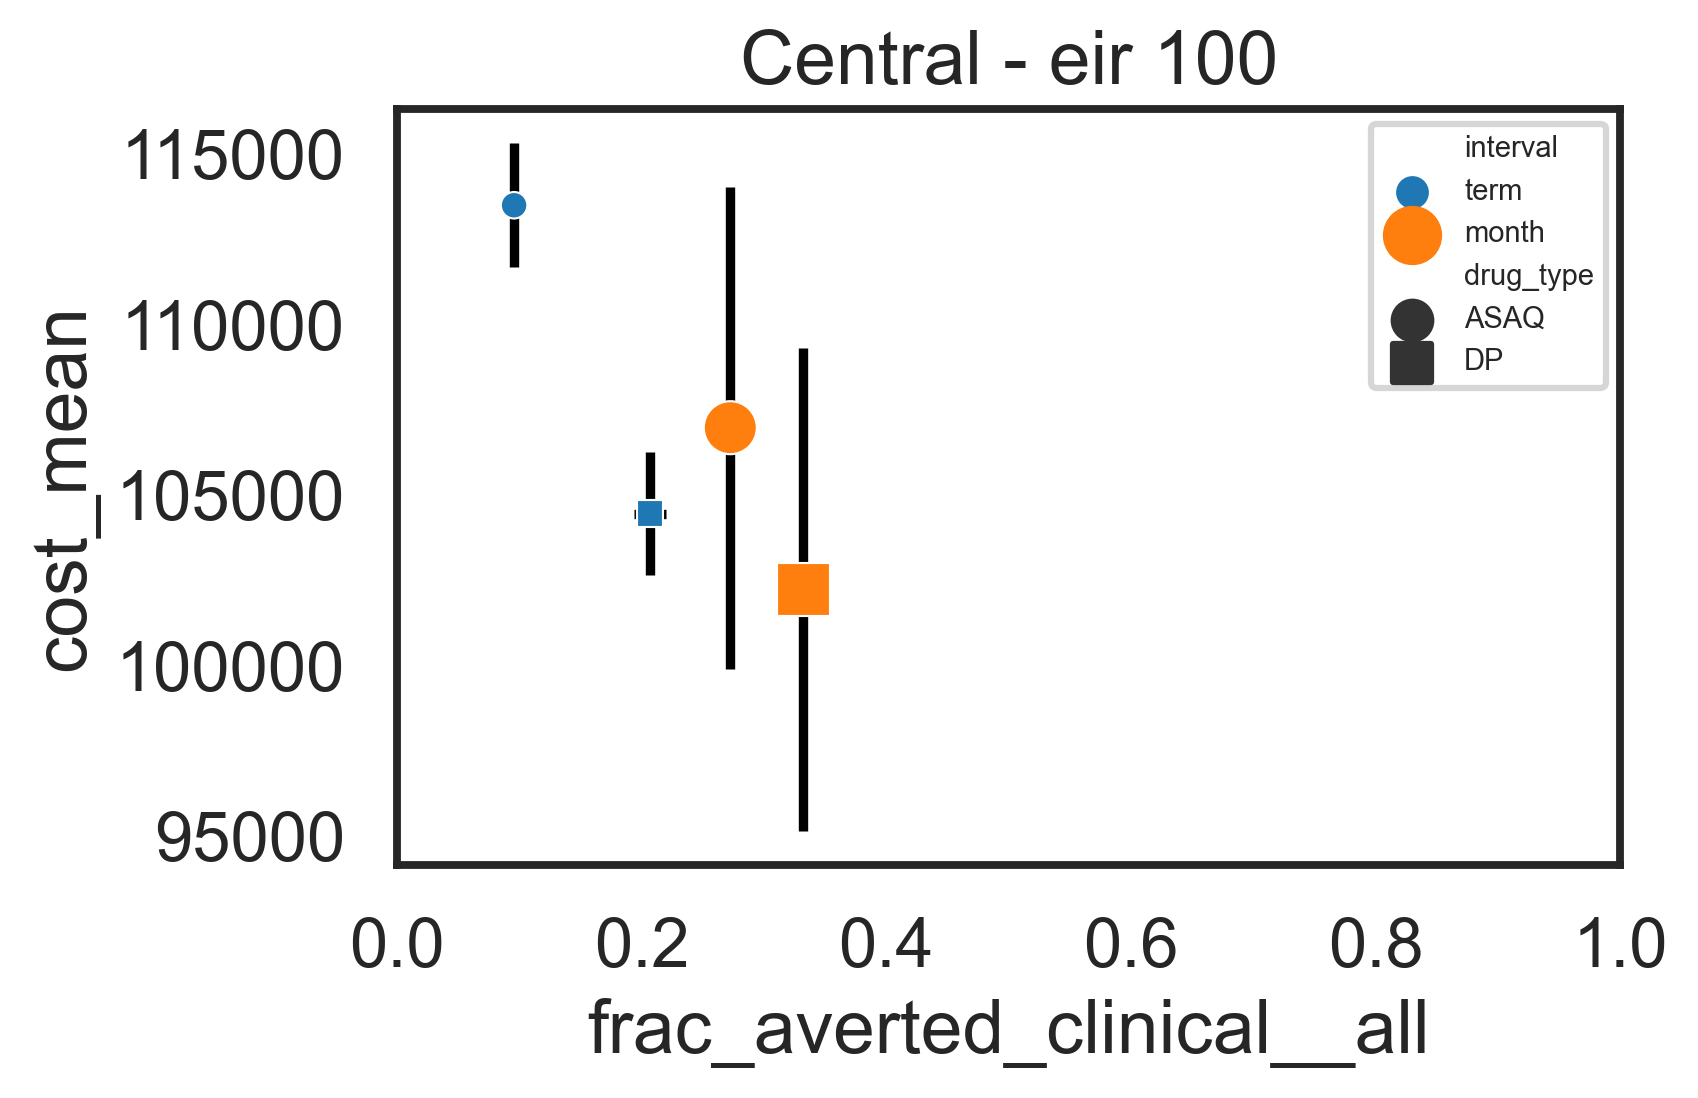

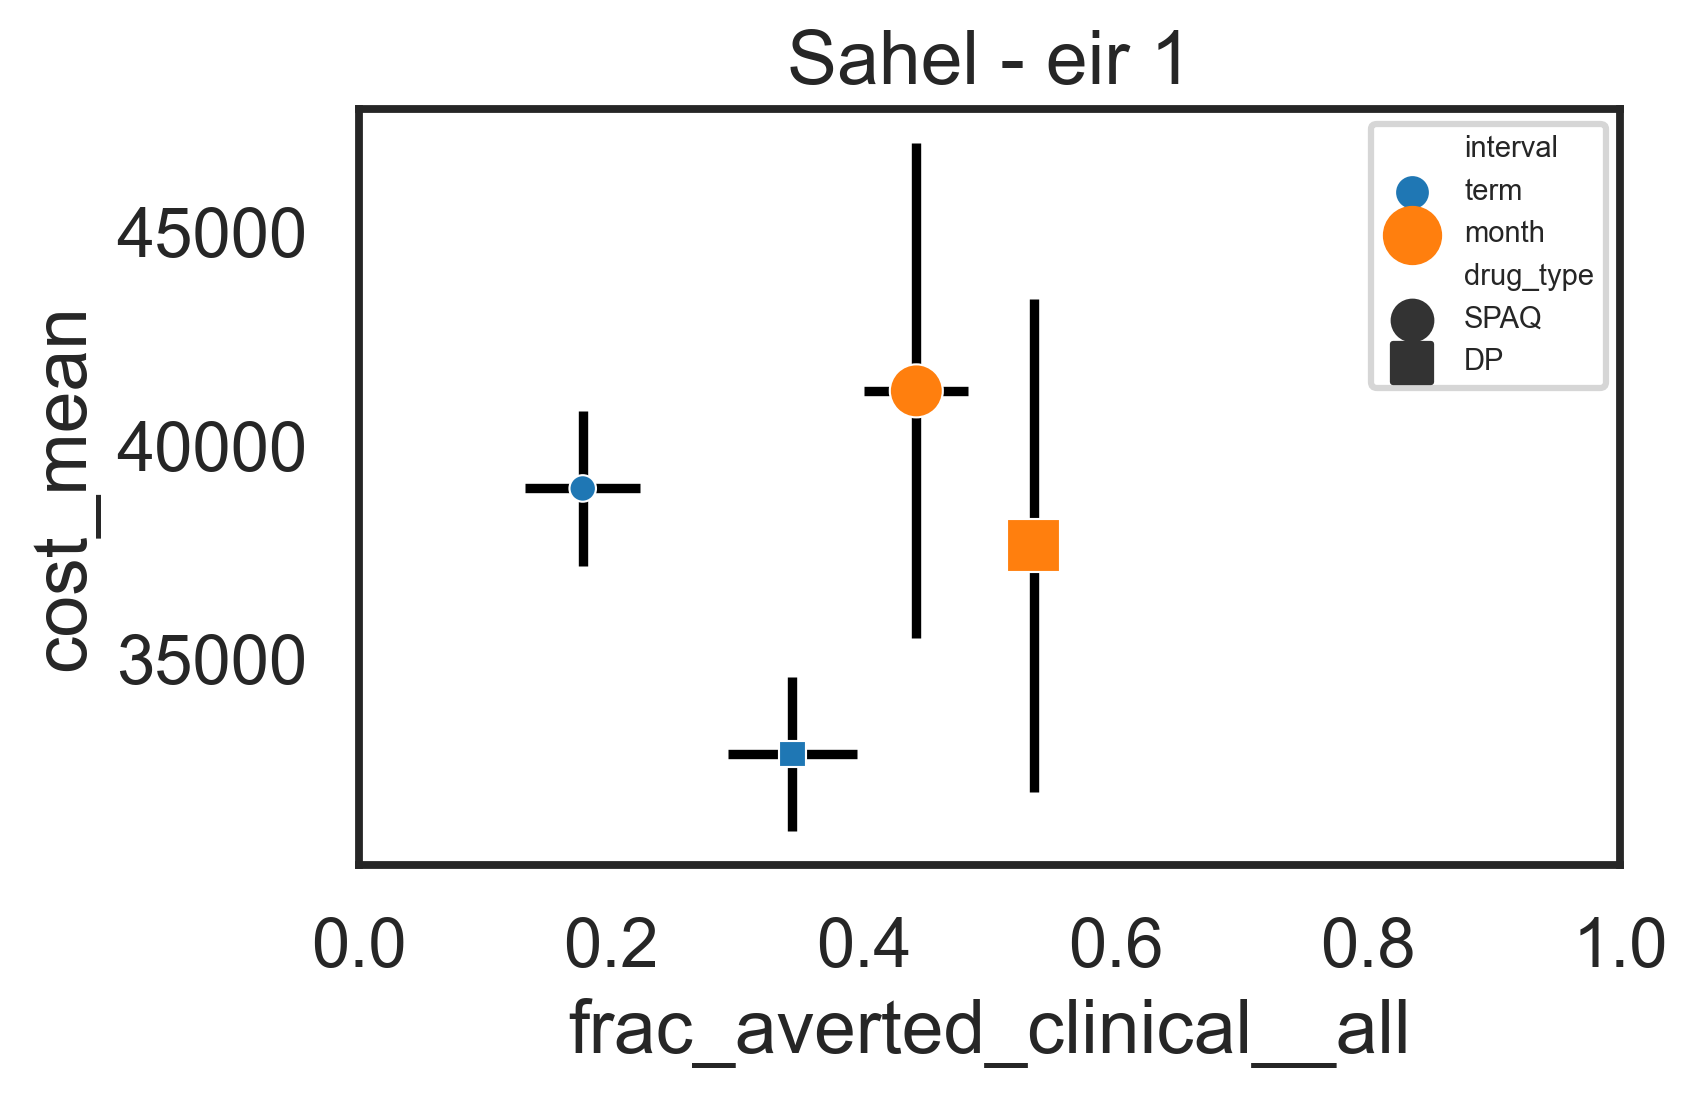

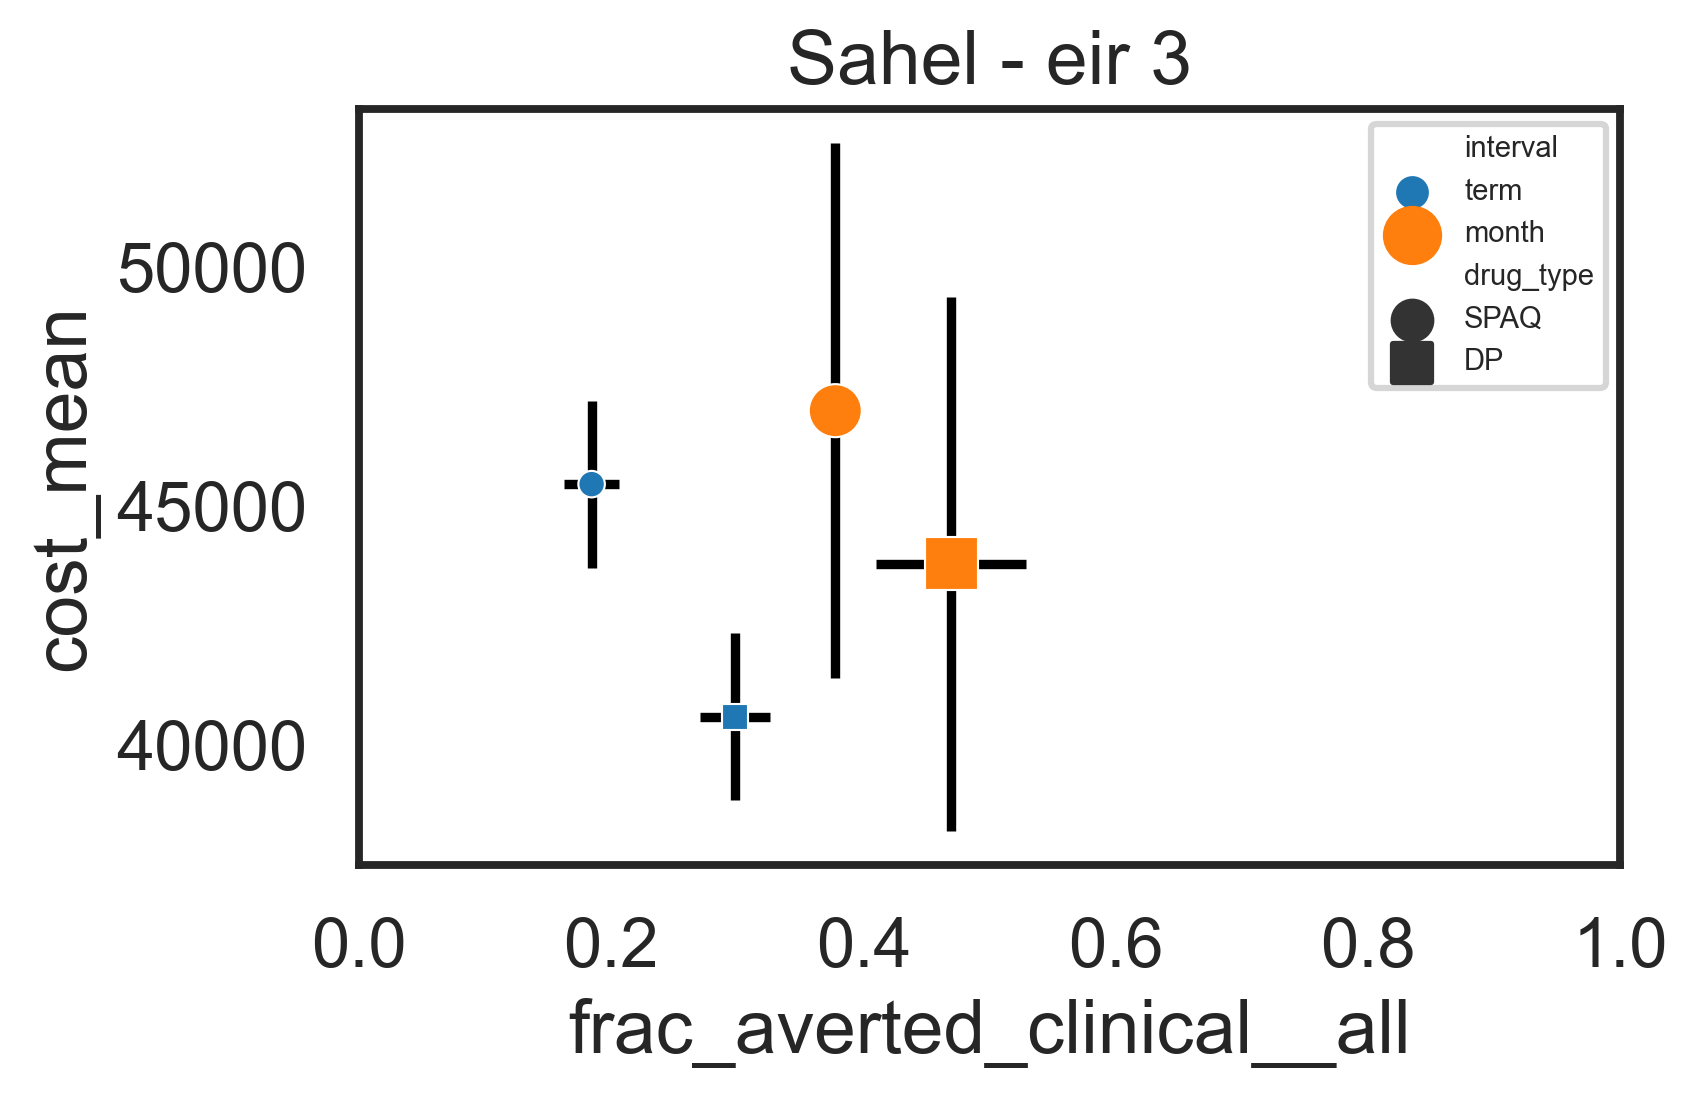

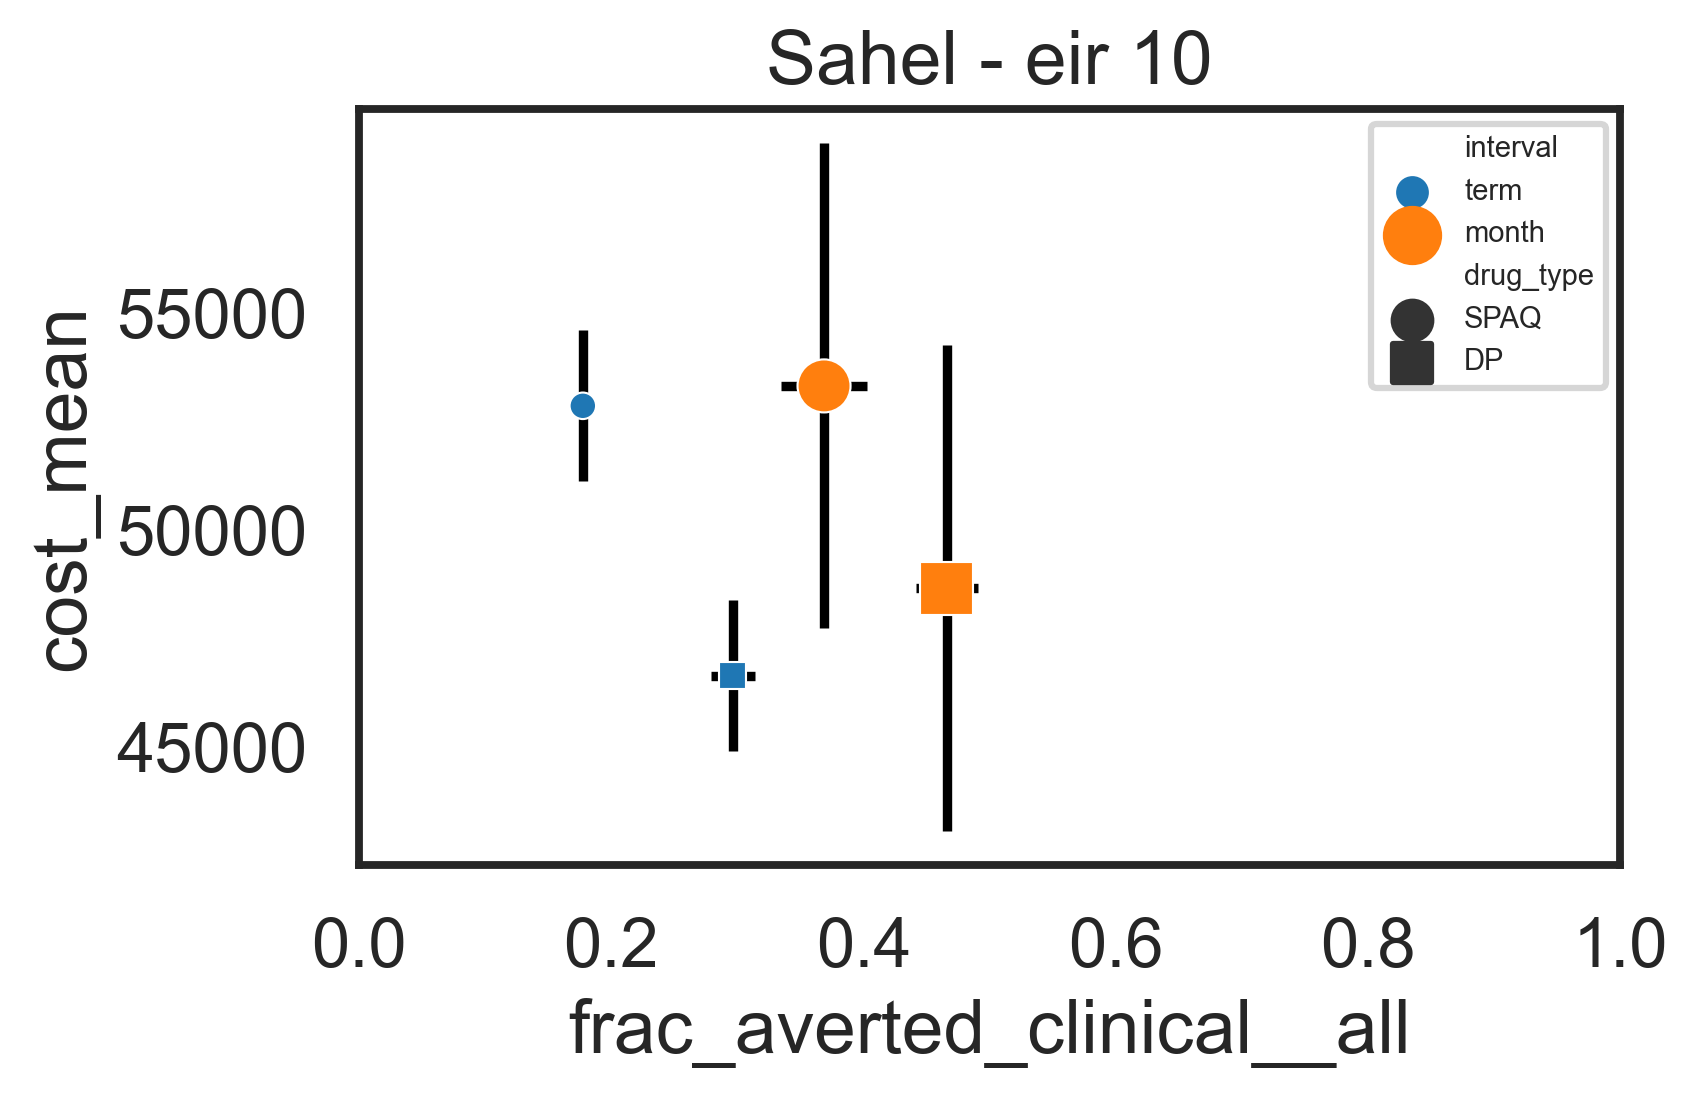

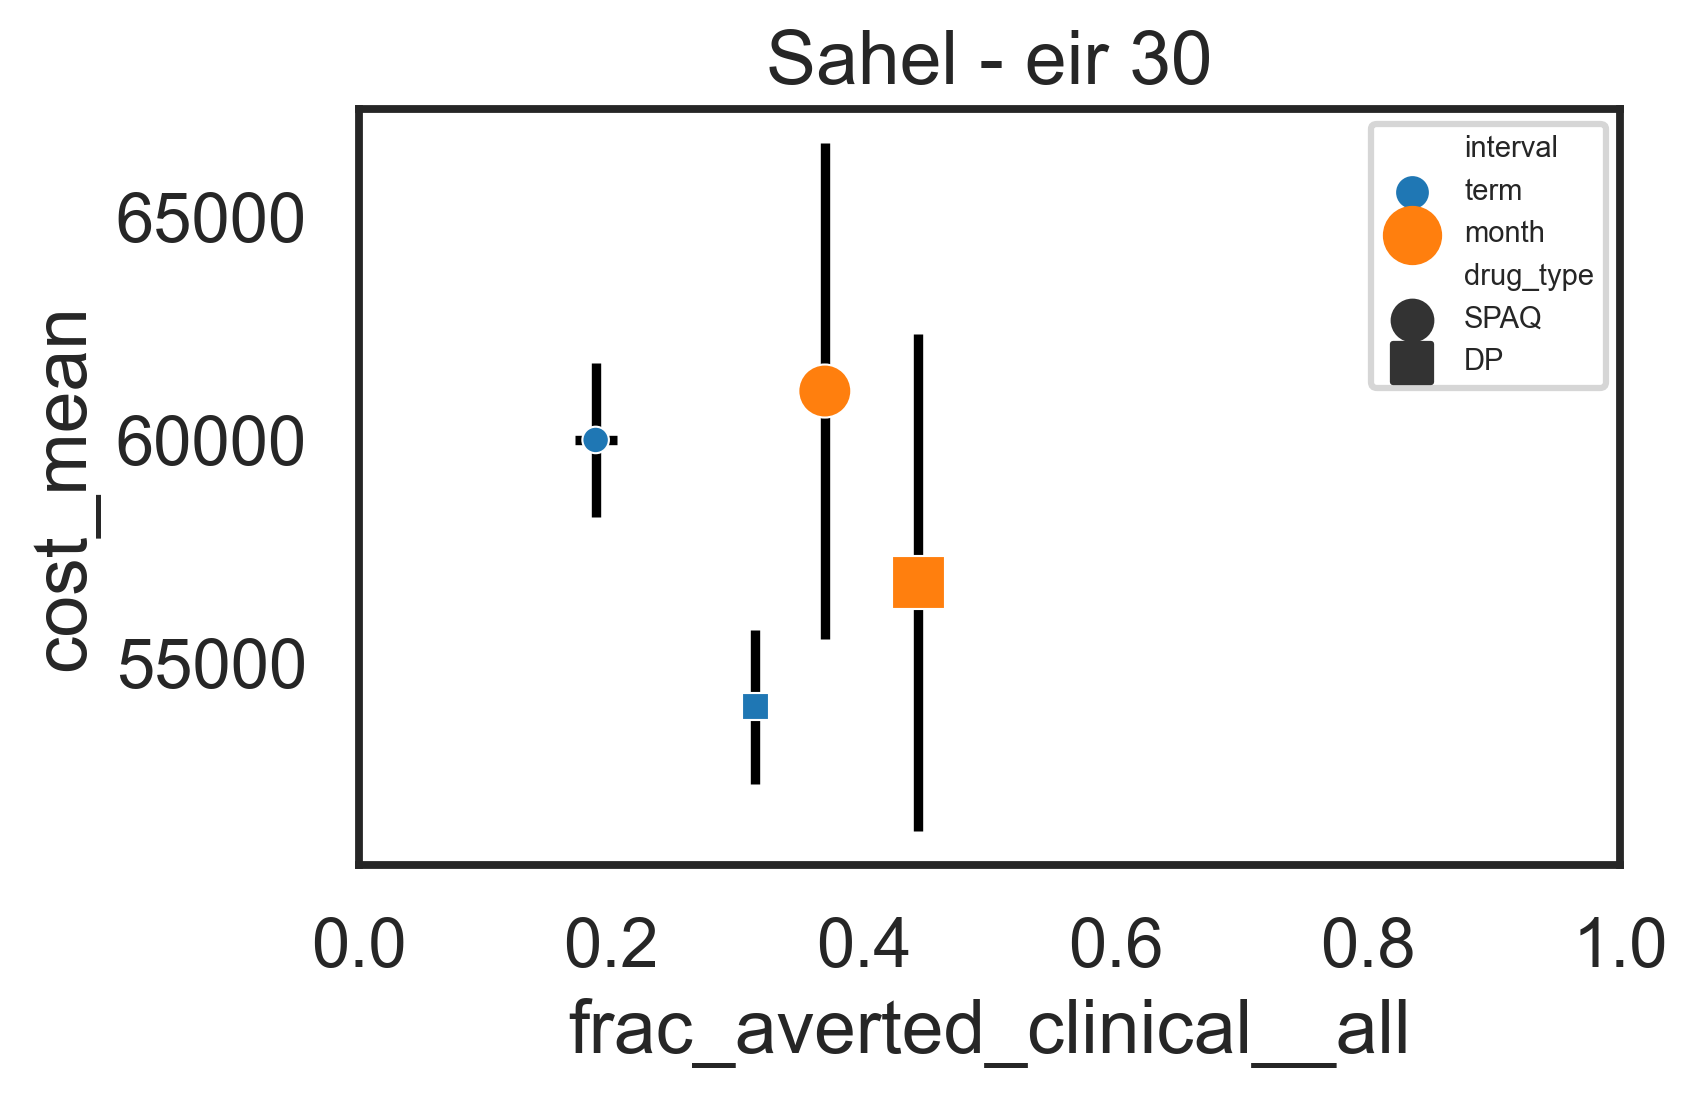

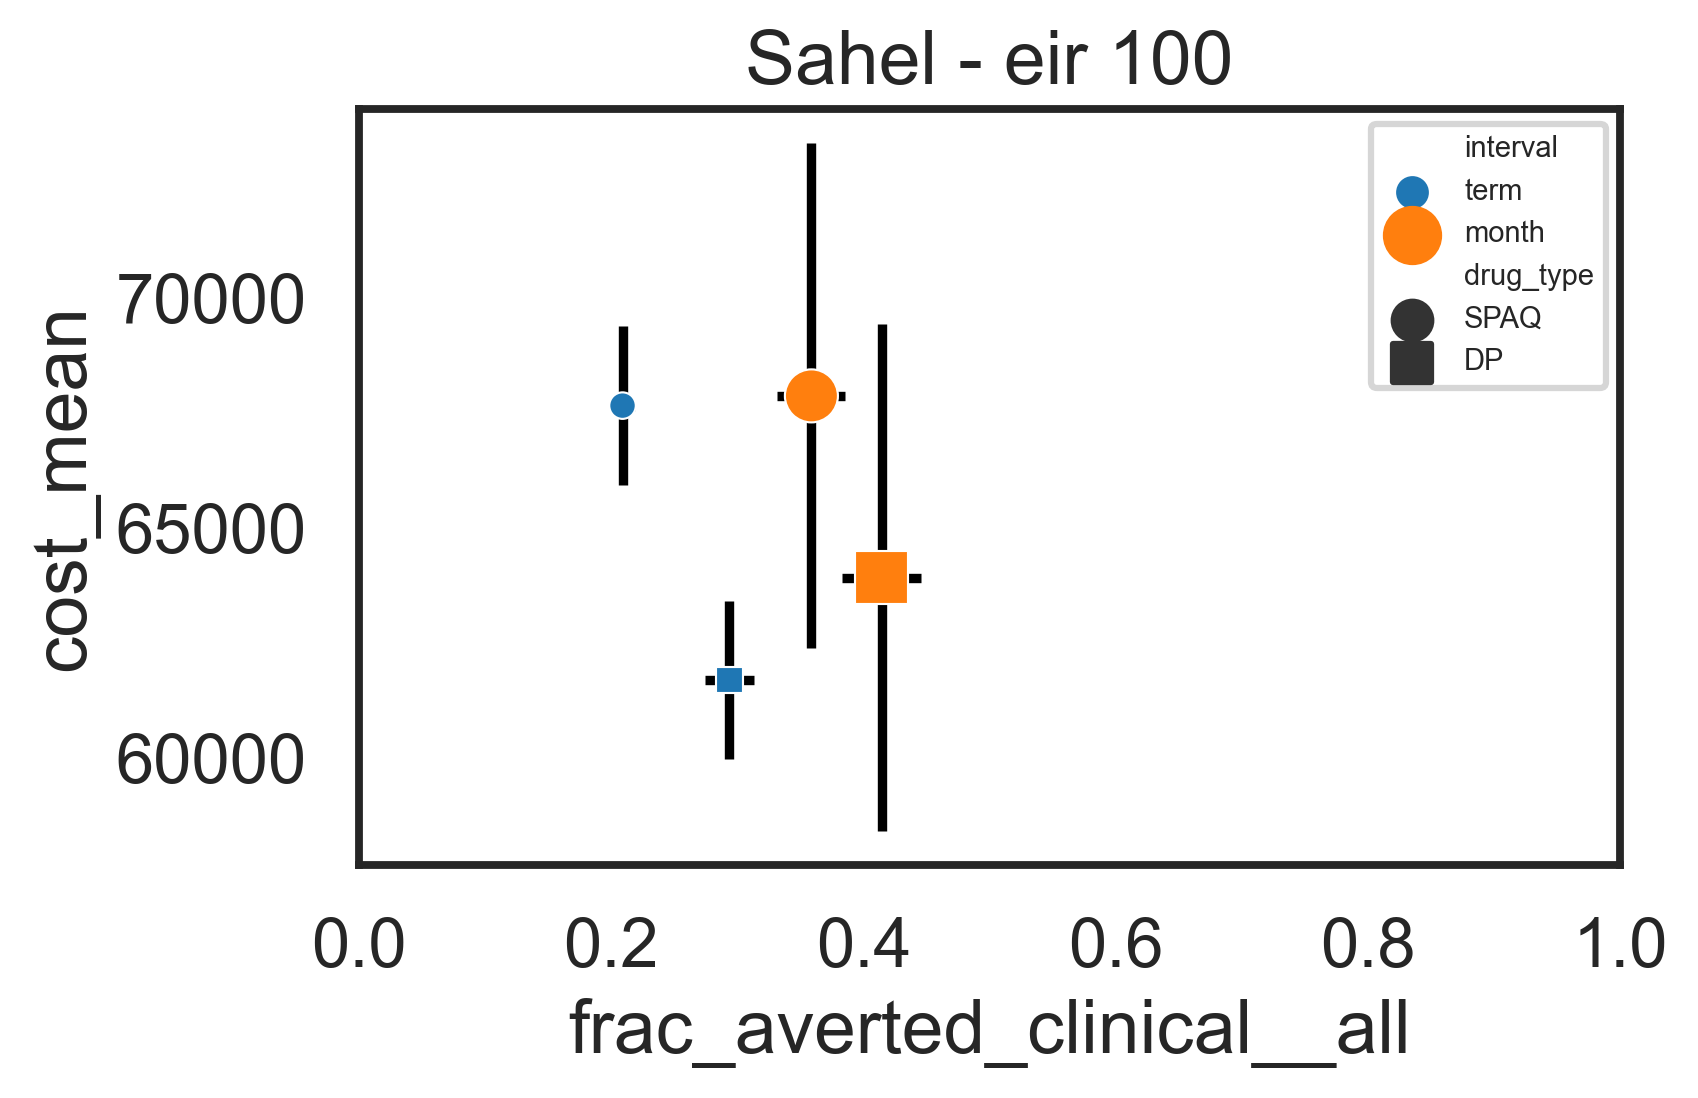

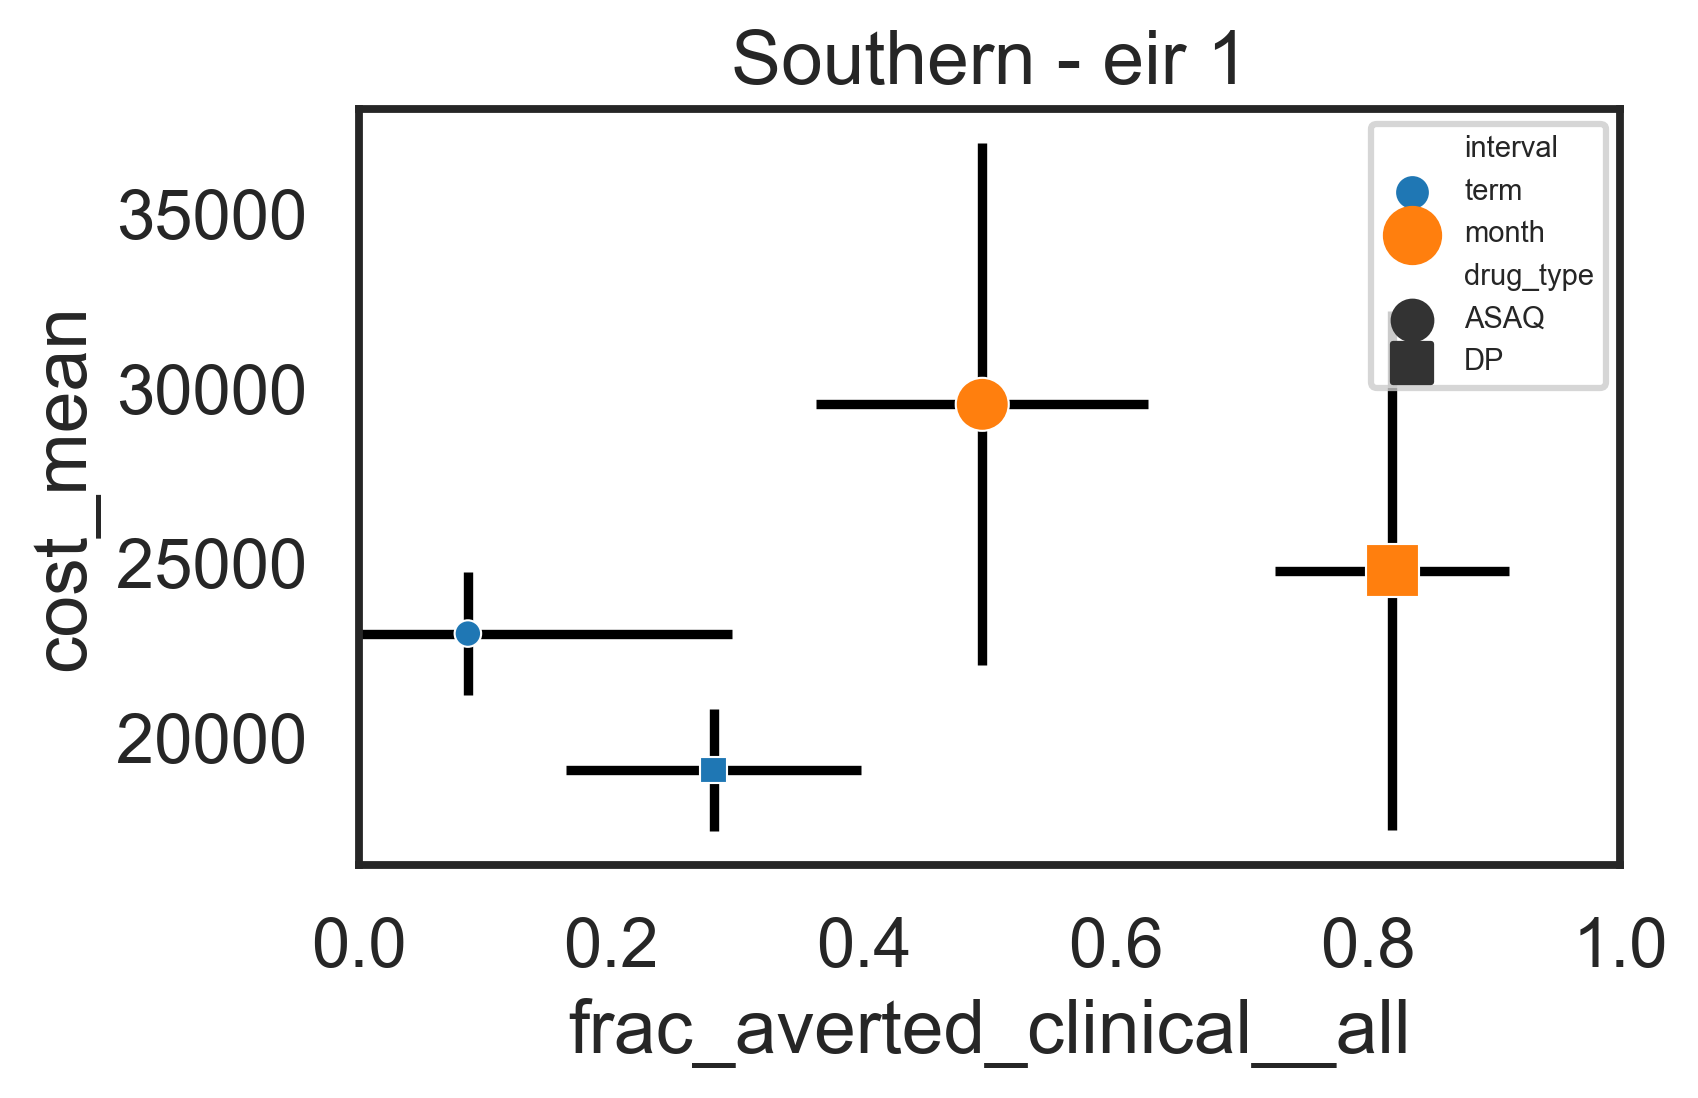

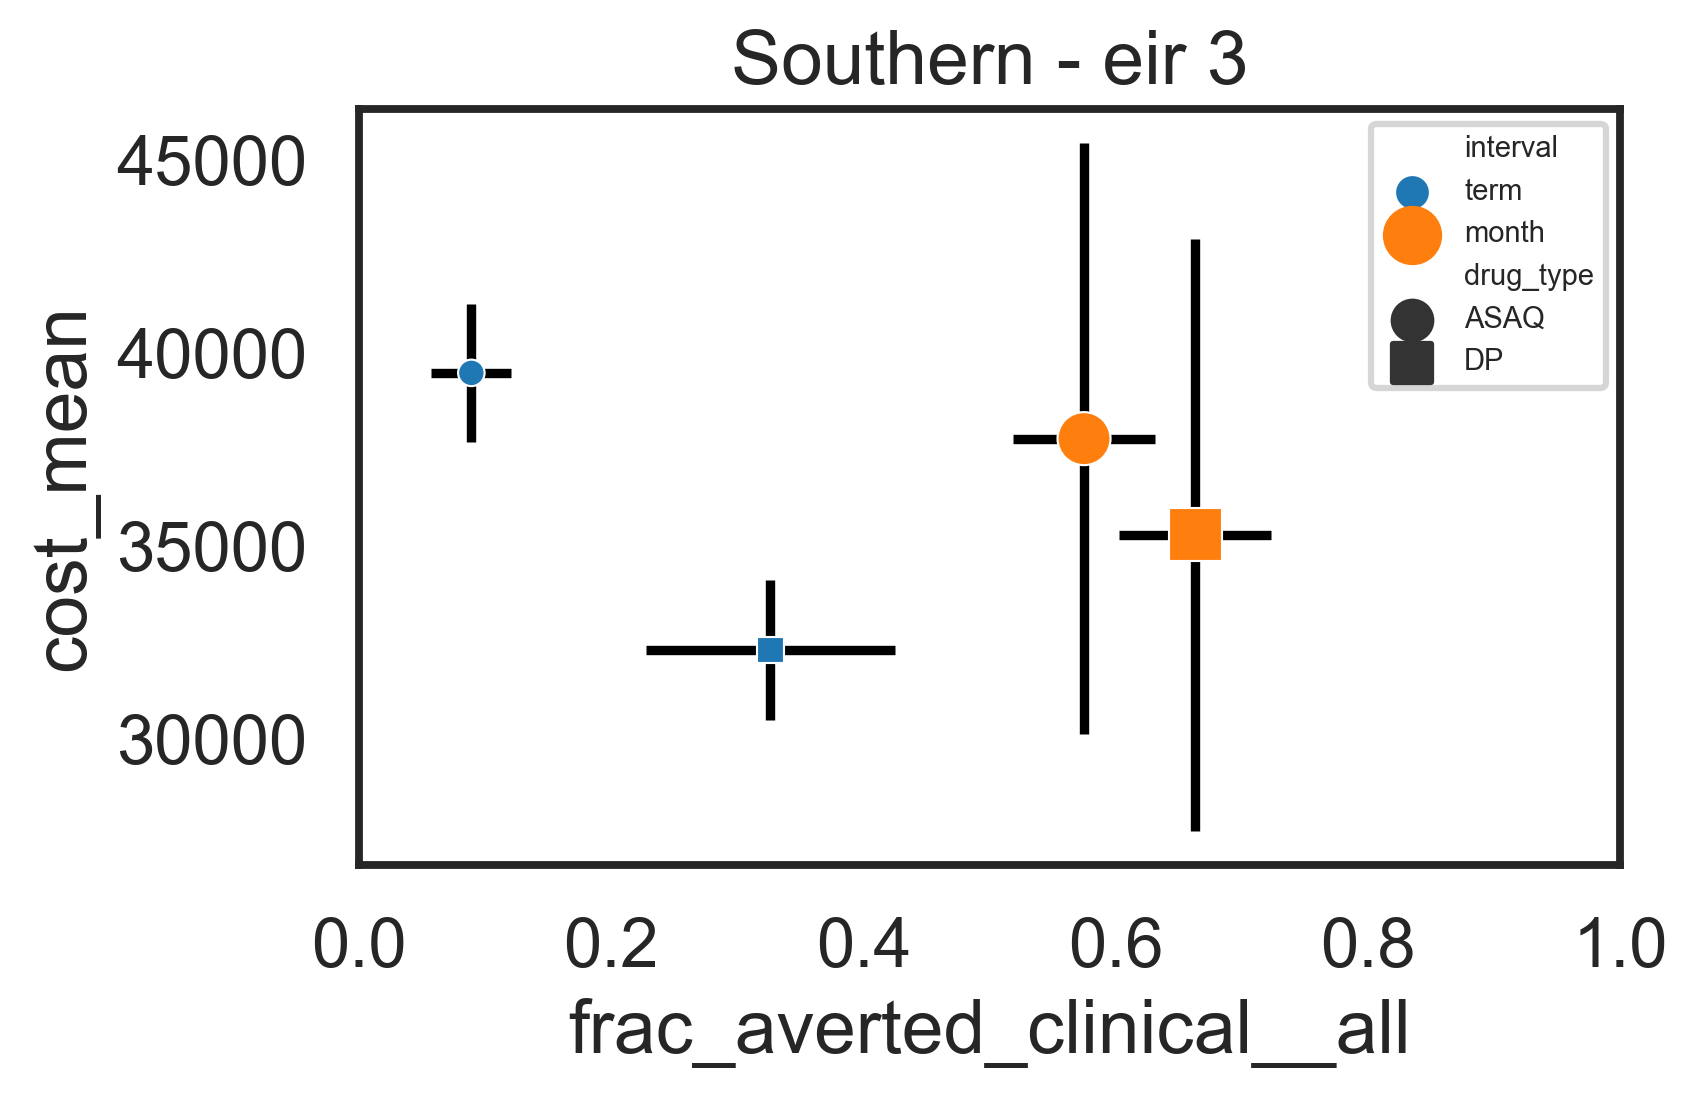

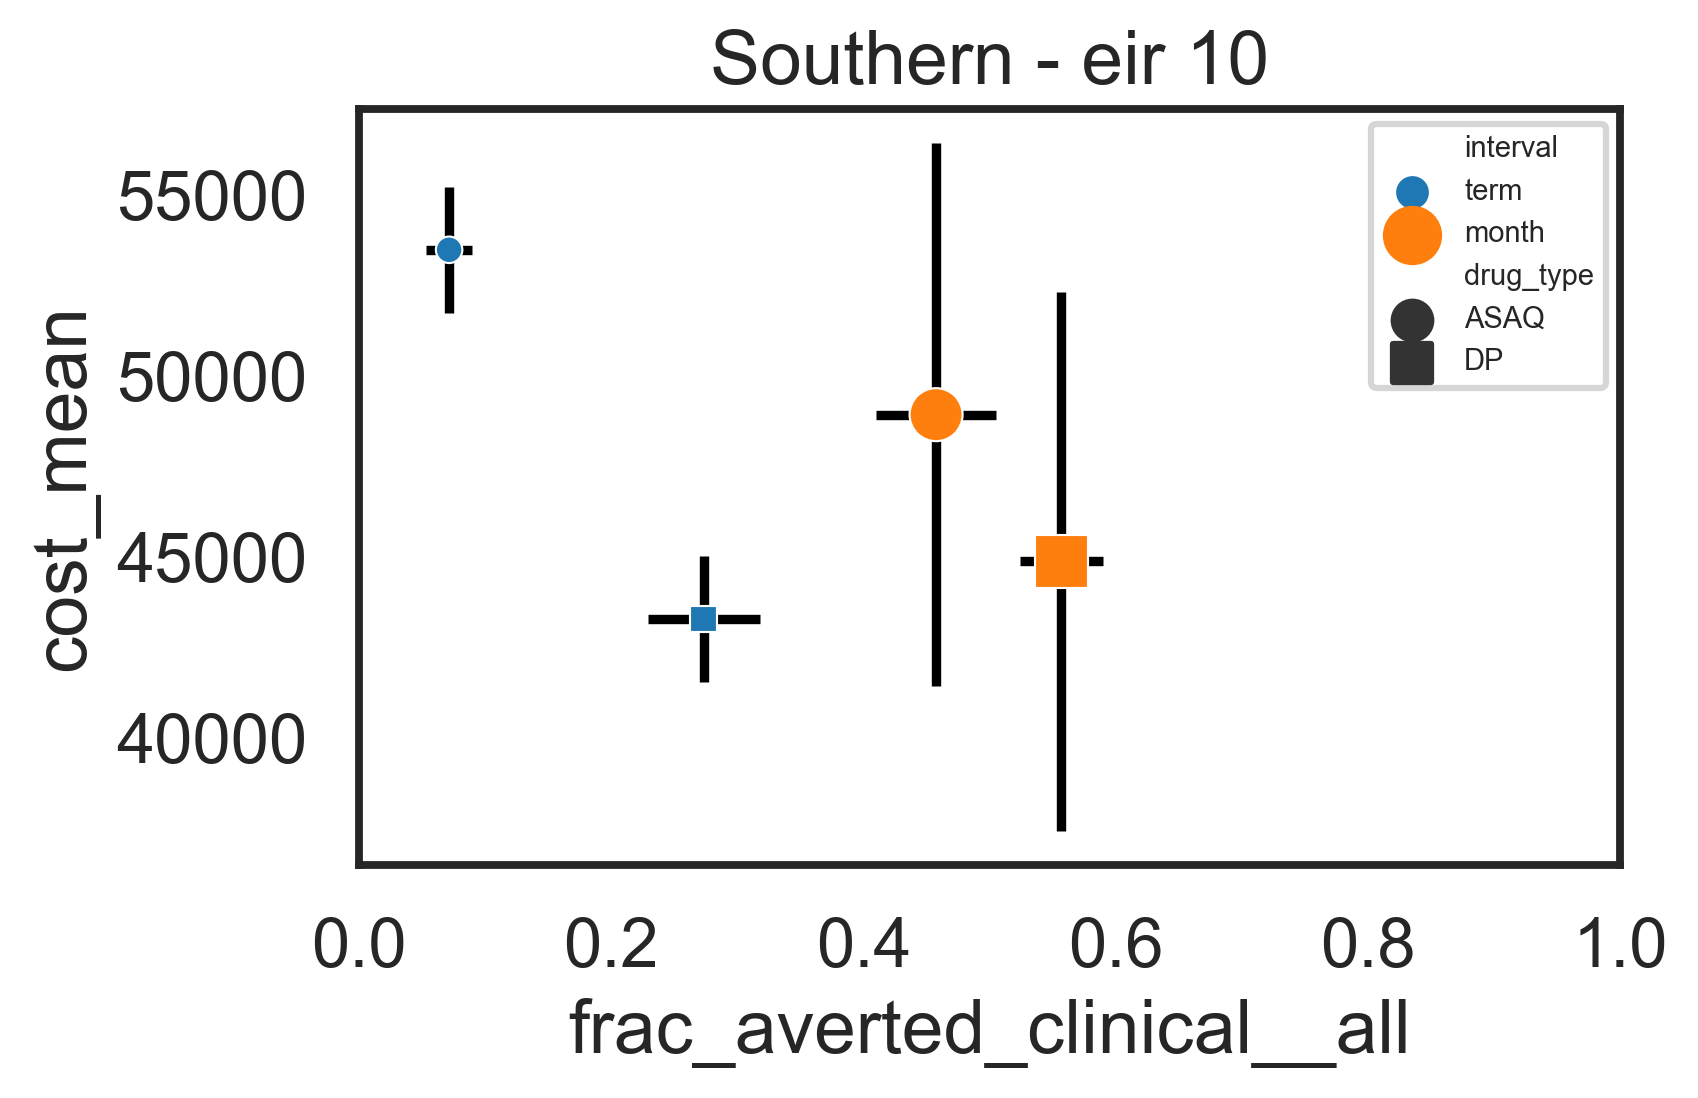

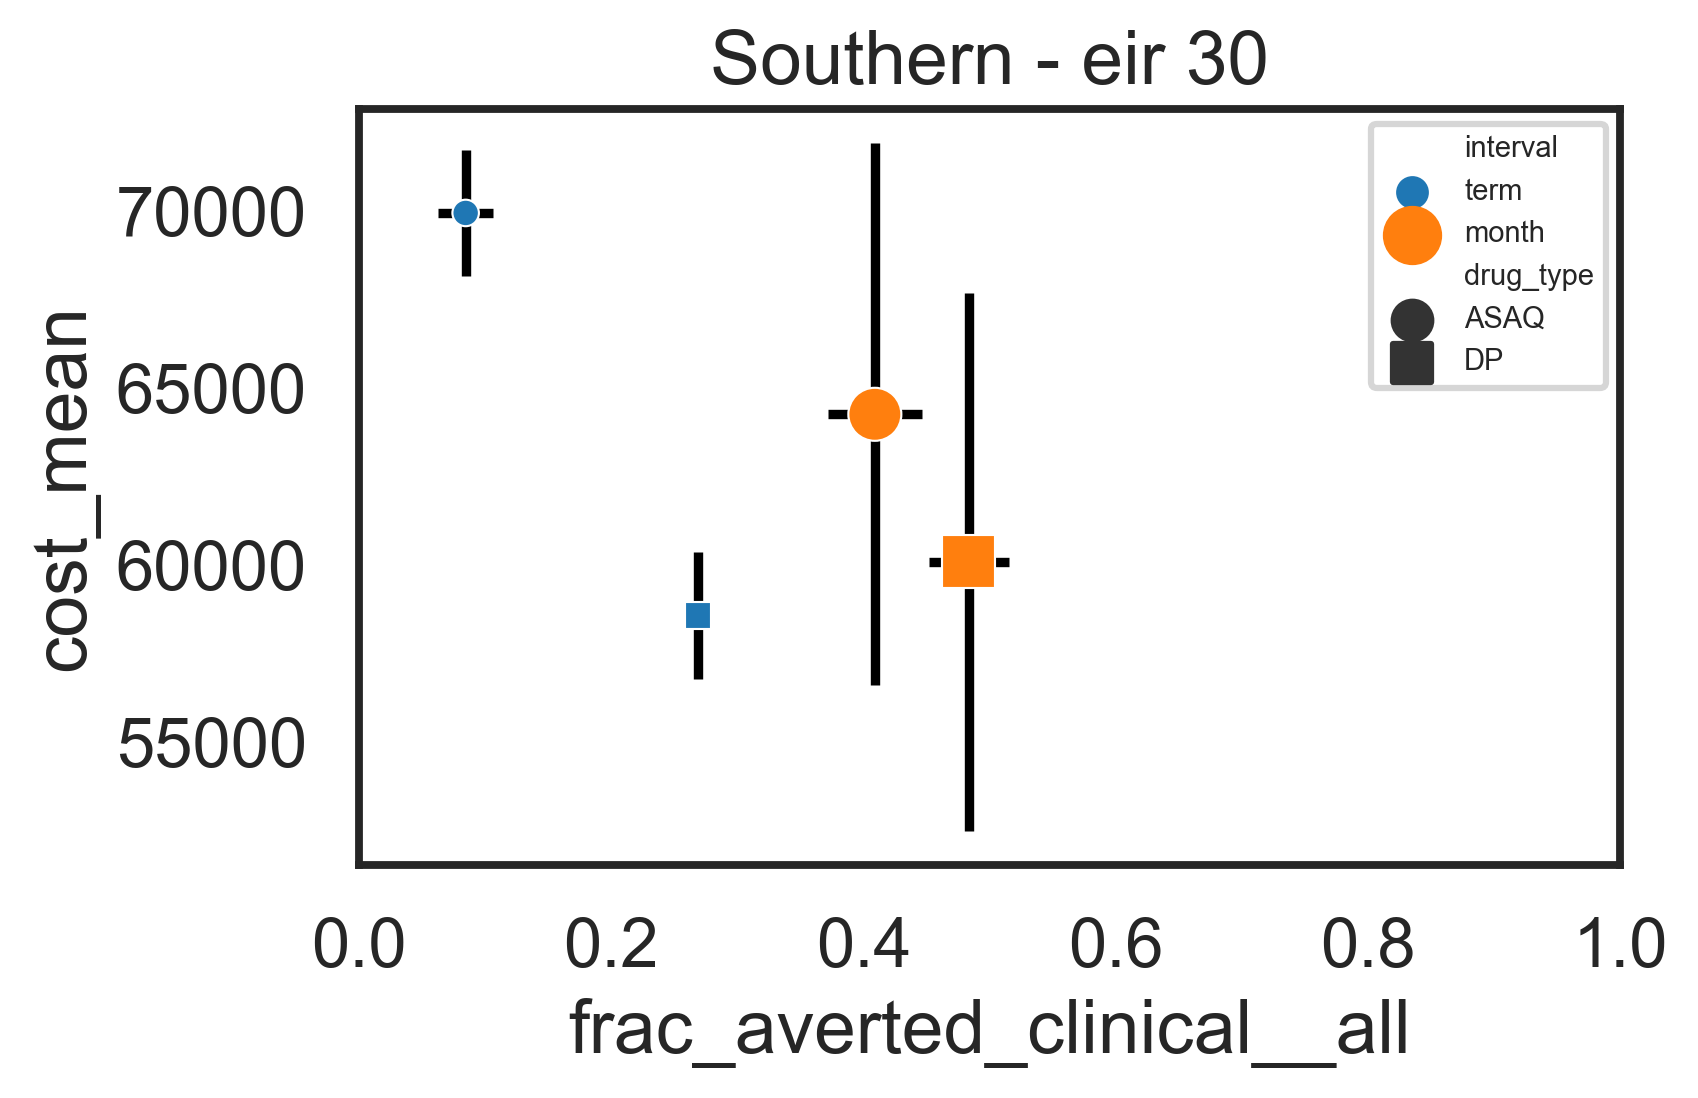

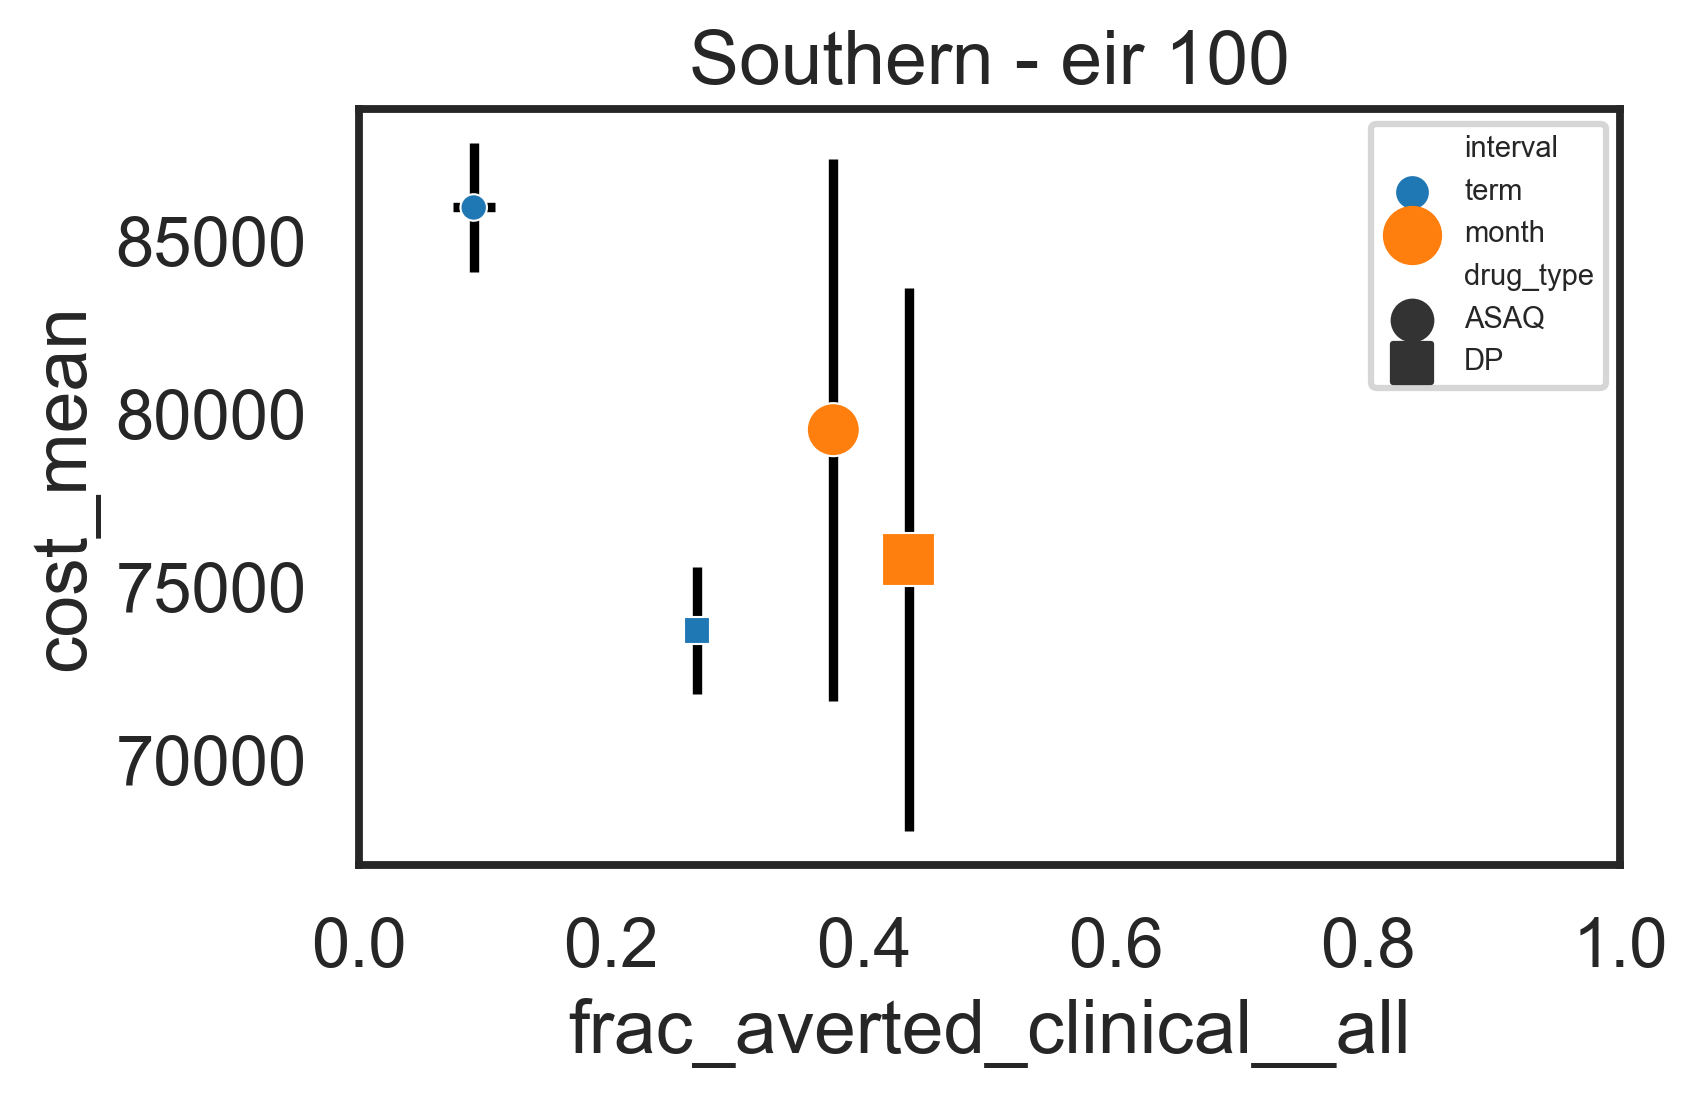

In [17]:
for a, sdf in df_scatterplot.groupby(["archetype", "baseline_eir"]):
    plt.figure(dpi=300)
    sdf_without_no_iptsc = sdf[np.logical_not(sdf["scenario_number"]==30)]
    sns.scatterplot(data=sdf_without_no_iptsc, x="frac_averted_clinical__all", y="cost_mean", style="drug_type", hue="interval", size="interval", size_order=["month","term"], zorder=2, markers=["o","s"])
    
    
    yerr = np.zeros([2,len(sdf_without_no_iptsc)])
    yerr[0:] = sdf_without_no_iptsc["cost_mean"]-sdf_without_no_iptsc["cost_low_IPTsc_only"]
    yerr[1:] = sdf_without_no_iptsc["cost_high_IPTsc_only"]-sdf_without_no_iptsc["cost_mean"]
    
    plt.errorbar(sdf_without_no_iptsc["frac_averted_clinical__all"], 
                 sdf_without_no_iptsc["cost_mean"], 
                 xerr=sdf_without_no_iptsc["frac_averted_clinical__all_STDEV"],
                 yerr=yerr,
                linestyle="none",
                color="black", zorder=1)
    
    # plt.scatter(sdf["frac_averted_clinical__all"], sdf["cost"]
    
#     no_iptsc = sdf[sdf["scenario_number"]==30]
#     plt.axhline(no_iptsc["cost_per1kpop_peryear"].iloc[0], color='black', linestyle='dotted')
    
    plt.title(f"{a[0]} - eir {a[1]}") 
    plt.legend(fontsize=7)
    # plt.ylim([0,15000])
    plt.xlim([0,1])
    
    plt.tight_layout()
    plt.savefig(f"figs/{a[0]}_{str(a[1]).zfill(3)}.png")
    plt.savefig(f"figs/{a[0]}_{str(a[1]).zfill(3)}.pdf")